[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20An%C3%A1lisis%20Estad%C3%ADstico/notebooks/exercises/Ejercicio_Nutriologos.ipynb)

##**Diplomado en Ciencia de Datos con Python 2024**##

Desarrolló: Adriana Muñoz, Tamara Osuna y Jessica Briseño


---



En este proyecto, nos adentraremos en el análisis de datos relacionados con la salud y el estilo de vida de individuos para explorar la posible relación entre diversas características y la presencia de enfermedades crónicas. Utilizaremos técnicas de generación de datos sintéticos y modelos de aprendizaje automático para entender mejor cómo factores como la edad, el peso, la actividad física y los hábitos alimenticios pueden influir en la salud a largo plazo.

El análisis comenzará con la generación de datos simulados que representen una variedad de características relevantes para la salud, como el peso, la altura, el nivel de actividad física, el consumo de alcohol y tabaco, entre otros. Luego, exploraremos estos datos para identificar posibles patrones y relaciones entre estas características y la presencia de enfermedades crónicas como la diabetes, la hipertensión y el cáncer.

Para llevar a cabo este análisis, utilizaremos herramientas como pandas y NumPy para la manipulación de datos, así como bibliotecas de visualización como Matplotlib y Seaborn para visualizar nuestros hallazgos. Además, aplicaremos modelos de aprendizaje automático, como Random Forest, para estimar la probabilidad de enfermedades crónicas en función de las características de los individuos.

A través de este proyecto, buscamos obtener una comprensión más profunda de cómo varios factores de estilo de vida y salud pueden contribuir al desarrollo de enfermedades crónicas, lo que puede ayudar en la identificación temprana y la prevención de estas condiciones.

# Ejercicio: NUTRIOLOGOS

Este ejercicio tiene como objetivo simular y analizar datos relacionados con la salud y el estilo de vida de individuos, con el fin de explorar patrones, relaciones y posibles predictores de enfermedades crónicas. Se generan datos sintéticos utilizando distribuciones estadísticas y lógica programática para representar una amplia gama de características relevantes para la salud, como edad, peso, hábitos alimenticios, historial médico familiar, niveles de actividad física, entre otros.

In [64]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Web scraping
from bs4 import BeautifulSoup

# Establecer la cantidad de datos a generar
cantidad_datos = 10000


#**1. Generación de datos simulados y creación df**

El proceso comienza con la generación de datos simulados para una muestra de individuos, donde cada individuo está representado por múltiples características. Estas características incluyen medidas físicas como peso, altura, índice de masa corporal (IMC), circunferencia de cintura, así como información sobre estilo de vida, hábitos alimenticios, nivel de actividad física, niveles de estrés, consumo de alcohol y tabaco, entre otros.


In [65]:
# Definir funciones para generar datos simulados
def generar_edad():
    return np.random.randint(18, 80, cantidad_datos)

def generar_peso(edad):
    # Para simular casos de obesidad en ciertas edades
    sobrepeso = np.random.choice([0, 1], cantidad_datos, p=[0.9, 0.1])  # 10% de casos de obesidad
    peso_base = np.random.normal(70, 15, cantidad_datos)  # Distribución normal con media de 70 kg y desviación estándar de 15 kg
    peso = peso_base + sobrepeso * 20  # Añadir 20 kg en caso de obesidad
    # Ajustar el peso basado en la edad
    peso = np.where((edad >= 40) & (edad <= 60), peso + 5, peso)  # Añadir 5 kg para edades entre 40 y 60
    return peso

def generar_altura():
    # Distribución normal con media de 170 cm y desviación estándar de 10 cm
    return np.random.normal(170, 10, cantidad_datos)

def calcular_imc(peso, altura):
    # Fórmula del Índice de Masa Corporal (IMC): peso (kg) / altura (m)^2
    return peso/((altura/100)**2)

def generar_circunferencia_cintura():
    # Distribución normal con media de 90 cm y desviación estándar de 10 cm
    return np.random.normal(90, 10, cantidad_datos)

def generar_circunferencia_cadera():
    # Distribución normal con media de 100 cm y desviación estándar de 10 cm
    return np.random.normal(100, 10, cantidad_datos)

def generar_porcentaje_grasa_corporal():
    # Distribución normal con media de 25% y desviación estándar de 5%
    return np.random.normal(25, 5, cantidad_datos)

def generar_historial_medico_familiar():
    # Simulación de historial médico familiar
    enfermedades = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares']
    return [', '.join(np.random.choice(enfermedades, np.random.randint(0, len(enfermedades)), replace=False)) for _ in range(cantidad_datos)]

def generar_nivel_actividad_fisica():
    return np.random.choice(['Sedentario', 'Ligero', 'Moderado', 'Intenso'], cantidad_datos)

def generar_habitos_alimenticios():
    habitos = ['Vegetariano', 'Omnívoro', 'Vegano', 'Pescetariano', 'Keto', 'Paleo']
    return np.random.choice(habitos, cantidad_datos)

def generar_horas_sueño_noche():
    # Distribución normal con media de 7 horas y desviación estándar de 2 hora
    return np.random.normal(17, 1, cantidad_datos)

def generar_nivel_estres_percibido():
    return np.random.randint(1, 11, cantidad_datos)

def generar_consumo_agua_diario():
    # Distribución normal con media de 2 litros y desviación estándar de 0.5 litros
    return np.random.normal(2, 0.5, cantidad_datos)

def generar_consumo_alcohol():
    # Distribución normal con media de 5 unidades por semana y desviación estándar de 3 unidades por semana
    return np.random.normal(5, 3, cantidad_datos)

def generar_consumo_tabaco():
    num_aleatorios = np.random.normal(loc=5, scale=3, size=cantidad_datos)
    CantCigarros=np.round(num_aleatorios).astype(int)
    CantCigarros[CantCigarros < 0] = 0
    return   CantCigarros

def generar_consumo_cafeina():
    # Distribución normal con media de 200 mg por día y desviación estándar de 100 mg por día
    return np.random.normal(200, 100, cantidad_datos)

def generar_enfermedades_cronicas():
    #enfermedades = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']

    enfermedades = ['Diabetes', 'Hipertensión', 'Cáncer']
    return [', '.join(np.random.choice(enfermedades, np.random.randint(0, len(enfermedades)), replace=False)) for _ in range(cantidad_datos)]

def generar_medicamentos_actuales():
    medicamentos = ['Aspirina', 'Insulina', 'Losartán', 'Atorvastatina', 'Metformina', 'Omeprazol', 'Salbutamol']
    dosis = ['10 mg', '50 mg', '100 mg', '20 mg', '200 UI', '500 mg', '1 tableta']
    return ['{}, {}'.format(np.random.choice(medicamentos), np.random.choice(dosis)) for _ in range(cantidad_datos)]

def generar_metas_perdida_peso():
    # Distribución normal con media de 5 kg y desviación estándar de 3 kg
    return np.random.normal(5, 3, cantidad_datos)

def generar_frecuencia_cardiaca_reposo():
    # Distribución normal con media de 70 latidos por minuto y desviación estándar de 10 latidos por minuto
    return np.random.normal(70, 10, cantidad_datos)

def generar_presion_arterial_sistolica():
    # Distribución normal con media de 120 mmHg y desviación estándar de 10 mmHg
    return np.random.normal(120, 10, cantidad_datos)

def generar_presion_arterial_diastolica():
    # Distribución normal con media de 80 mmHg y desviación estándar de 8 mmHg
    return np.random.normal(80, 8, cantidad_datos)

def generar_niveles_colesterol():
    ldl = np.random.normal(100, 20, cantidad_datos)  # LDL: media de 100 mg/dL, desviación estándar de 20 mg/dL
    hdl = np.random.normal(50, 10, cantidad_datos)  # HDL: media de 50 mg/dL, desviación estándar de 10 mg/dL
    trigliceridos = np.random.normal(150, 30, cantidad_datos)  # Triglicéridos: media de 150 mg/dL, desviación estándar de 30 mg/dL
    return ldl, hdl, trigliceridos

def generar_niveles_glucosa_sangre():
    ayunas = np.random.normal(90, 10, cantidad_datos)  # Niveles de glucosa en ayunas: media de 90 mg/dL, desviación estándar de 10 mg/dL
    postprandial = np.random.normal(120, 20, cantidad_datos)  # Niveles de glucosa postprandial: media de 120 mg/dL, desviación estándar de 20 mg/dL
    return ayunas, postprandial

def generar_sensibilidad_alimentos():
    alimentos = ['Lactosa', 'Gluten', 'Nueces', 'Mariscos', 'Huevo', 'Soja']
    return [', '.join(np.random.choice(alimentos, np.random.randint(0, len(alimentos)), replace=False)) for _ in range(cantidad_datos)]

def generar_nivel_satisfaccion_dieta_actual():
    return np.random.randint(1, 11, cantidad_datos)

def generar_cumplimiento_plan_nutricional():
    return np.random.randint(1, 11, cantidad_datos)

def generar_actividades_fisicas_realizadas():
    actividades = ['Caminar', 'Correr', 'Nadar', 'Bailar', 'Levantamiento de pesas', 'Yoga']
    return [', '.join(np.random.choice(actividades, np.random.randint(1, 4), replace=False)) for _ in range(cantidad_datos)]

def generar_consumo_frutas_verduras():
    # Distribución normal con media de 5 porciones por día y desviación estándar de 2 porciones por día
    return np.random.normal(5, 2, cantidad_datos)

def generar_nivel_conocimiento_nutricion():
    return np.random.choice(['Bajo', 'Medio', 'Alto'], cantidad_datos)

In [66]:
# Generar datos simulados
edades = generar_edad()
data = {
    'Edad': edades,
    'Peso (kg)': generar_peso(edades),
    'Altura (cm)': generar_altura(),
    'IMC': calcular_imc(generar_peso(edades), generar_altura()),
    'Circunferencia de cintura (cm)': generar_circunferencia_cintura(),
    'Circunferencia de cadera (cm)': generar_circunferencia_cadera(),
    'Porcentaje de grasa corporal (%)': generar_porcentaje_grasa_corporal(),
    'Historial médico familiar': generar_historial_medico_familiar(),
    'Nivel de actividad física': generar_nivel_actividad_fisica(),
    'Hábitos alimenticios': generar_habitos_alimenticios(),
    'Horas de sueño por noche': generar_horas_sueño_noche(),
    'Nivel de estrés percibido': generar_nivel_estres_percibido(),
    'Consumo de agua diario (litros)': generar_consumo_agua_diario(),
    'Consumo de alcohol semanal (unidades)': generar_consumo_alcohol(),
    'Consumo de tabaco diario (cigarrillos)': generar_consumo_tabaco(),
    'Consumo de cafeína diario (mg)': generar_consumo_cafeina(),
    'Enfermedades crónicas': generar_enfermedades_cronicas(),
    'Medicamentos actuales': generar_medicamentos_actuales(),
    'Metas de pérdida de peso (kg)': generar_metas_perdida_peso(),
    'Frecuencia cardíaca en reposo (latidos por minuto)': generar_frecuencia_cardiaca_reposo(),
    'Presión arterial sistólica (mmHg)': generar_presion_arterial_sistolica(),
    'Presión arterial diastólica (mmHg)': generar_presion_arterial_diastolica(),
    'Niveles de colesterol (LDL)': generar_niveles_colesterol()[0],
    'Niveles de colesterol (HDL)': generar_niveles_colesterol()[1],
    'Niveles de colesterol (Triglicéridos)': generar_niveles_colesterol()[2],
    'Niveles de glucosa en sangre (Ayunas)': generar_niveles_glucosa_sangre()[0],
    'Niveles de glucosa en sangre (Postprandial)': generar_niveles_glucosa_sangre()[1],
    'Sensibilidad a alimentos': generar_sensibilidad_alimentos(),
    'Nivel de satisfacción con la dieta actual': generar_nivel_satisfaccion_dieta_actual(),
    'Cumplimiento del plan nutricional': generar_cumplimiento_plan_nutricional(),
    'Actividades físicas realizadas': generar_actividades_fisicas_realizadas(),
    'Consumo de frutas y verduras diario (porciones)': generar_consumo_frutas_verduras(),
    'Nivel de conocimiento en nutrición': generar_nivel_conocimiento_nutricion()
}

# SE CREA UN DATAFRAME DE PANDAS
df = pd.DataFrame(data)   #Para el análisis de Random Forest


#**2. Análisis exploratorio de los datos**   Modelo estimar enfermedades

In [67]:
df.dtypes

Edad                                                    int64
Peso (kg)                                             float64
Altura (cm)                                           float64
IMC                                                   float64
Circunferencia de cintura (cm)                        float64
Circunferencia de cadera (cm)                         float64
Porcentaje de grasa corporal (%)                      float64
Historial médico familiar                              object
Nivel de actividad física                              object
Hábitos alimenticios                                   object
Horas de sueño por noche                              float64
Nivel de estrés percibido                               int64
Consumo de agua diario (litros)                       float64
Consumo de alcohol semanal (unidades)                 float64
Consumo de tabaco diario (cigarrillos)                  int64
Consumo de cafeína diario (mg)                        float64
Enfermed

In [68]:
## Exploración de datos
df.describe()

,Edad,Peso (kg),Altura (cm),IMC,Circunferencia de cintura (cm),Circunferencia de cadera (cm),Porcentaje de grasa corporal (%),Horas de sueño por noche,Nivel de estrés percibido,Consumo de agua diario (litros),...,Presión arterial sistólica (mmHg),Presión arterial diastólica (mmHg),Niveles de colesterol (LDL),Niveles de colesterol (HDL),Niveles de colesterol (Triglicéridos),Niveles de glucosa en sangre (Ayunas),Niveles de glucosa en sangre (Postprandial),Nivel de satisfacción con la dieta actual,Cumplimiento del plan nutricional,Consumo de frutas y verduras diario (porciones)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,48.739200,73.920772,169.880200,25.772562,90.087390,100.074012,24.936768,16.992995,5.46870,1.994684,...,119.919248,80.072663,100.322406,50.127152,150.251707,90.065897,119.677516,5.481000,5.500700,4.987683
std,17.851707,16.177232,10.066184,6.505586,9.984728,9.986142,5.019605,1.000253,2.87013,0.501634,...,9.936663,8.073461,20.030904,10.004028,30.081694,9.994835,19.857550,2.864901,2.865627,1.981207
min,18.000000,15.667921,126.900480,4.240914,56.951878,64.918498,3.105182,13.260927,1.00000,-0.302502,...,80.591812,48.301526,23.597589,12.104397,34.232303,48.559622,46.020461,1.000000,1.000000,-2.772136
25%,34.000000,63.007754,163.011623,21.256934,83.178298,93.424427,21.500702,16.309202,3.00000,1.654398,...,113.197251,74.650818,86.715307,43.408784,129.799825,83.339386,106.349651,3.000000,3.000000,3.656944
50%,48.000000,73.662885,169.808379,25.280543,90.155519,100.006352,24.968626,17.000564,5.00000,1.995915,...,119.943270,80.062193,100.485458,49.949882,150.316453,89.957997,119.776742,5.000000,6.000000,4.973910
75%,64.000000,84.369489,176.599232,29.854215,96.957229,106.785891,28.383007,17.677034,8.00000,2.332003,...,126.604579,85.538142,113.871263,56.897555,170.609319,96.799992,132.986545,8.000000,8.000000,6.333887
max,79.000000,137.029851,209.869793,65.863861,130.069759,134.876596,43.757990,21.085035,10.00000,3.703424,...,160.139130,112.096657,178.704678,88.329526,277.638574,128.122348,195.807243,10.000000,10.000000,12.949543


Se muestra un dataframe que comprende una variedad de características relacionadas con la salud y el estilo de vida de los individuos. Entre ellas se incluyen la edad, peso en kilogramos, altura en centímetros, índice de masa corporal (IMC), circunferencia de cintura y de cadera en centímetros, porcentaje de grasa corporal, historial médico familiar, nivel de actividad física, hábitos alimenticios, horas de sueño por noche, nivel de estrés percibido, consumo de agua diario en litros, consumo semanal de alcohol en unidades, consumo diario de tabaco en cigarrillos, consumo diario de cafeína en miligramos, enfermedades crónicas, medicamentos actuales, metas de pérdida de peso en kilogramos, frecuencia cardíaca en reposo en latidos por minuto, presión arterial sistólica y diastólica en mmHg, niveles de colesterol LDL, HDL y triglicéridos, niveles de glucosa en sangre en ayunas y postprandial, sensibilidad a alimentos, nivel de satisfacción con la dieta actual, cumplimiento del plan nutricional, actividades físicas realizadas y consumo diario de frutas y verduras en porciones.











In [69]:
df.columns

Index(['Edad', 'Peso (kg)', 'Altura (cm)', 'IMC',
       'Circunferencia de cintura (cm)', 'Circunferencia de cadera (cm)',
       'Porcentaje de grasa corporal (%)', 'Historial médico familiar',
       'Nivel de actividad física', 'Hábitos alimenticios',
       'Horas de sueño por noche', 'Nivel de estrés percibido',
       'Consumo de agua diario (litros)',
       'Consumo de alcohol semanal (unidades)',
       'Consumo de tabaco diario (cigarrillos)',
       'Consumo de cafeína diario (mg)', 'Enfermedades crónicas',
       'Medicamentos actuales', 'Metas de pérdida de peso (kg)',
       'Frecuencia cardíaca en reposo (latidos por minuto)',
       'Presión arterial sistólica (mmHg)',
       'Presión arterial diastólica (mmHg)', 'Niveles de colesterol (LDL)',
       'Niveles de colesterol (HDL)', 'Niveles de colesterol (Triglicéridos)',
       'Niveles de glucosa en sangre (Ayunas)',
       'Niveles de glucosa en sangre (Postprandial)',
       'Sensibilidad a alimentos', 'Nivel de sat

In [70]:
## Columnas a analizar

#Columnas=Muestra_df.columns     ##Todas las columnas del dataframe
Columnas=['Edad',
       'Peso (kg)',
       'Altura (cm)',
       #'IMC',
       'Circunferencia de cintura (cm)',
       #'Circunferencia de cadera (cm)',
       'Porcentaje de grasa corporal (%)',
       #'Historial médico familiar',
       'Nivel de actividad física',
       #'Hábitos alimenticios',
       #'Horas de sueño por noche',
       'Nivel de estrés percibido',
       #'Consumo de agua diario (litros)',
       'Consumo de alcohol semanal (unidades)',
       'Consumo de tabaco diario (cigarrillos)',
       #'Consumo de cafeína diario (mg)',
       'Enfermedades crónicas',
       #'Medicamentos actuales',
       #'Metas de pérdida de peso (kg)',
       'Frecuencia cardíaca en reposo (latidos por minuto)',
       #'Presión arterial sistólica (mmHg)',
       #'Presión arterial diastólica (mmHg)',
       #'Niveles de colesterol (LDL)',
       #'Niveles de colesterol (HDL)',
       #'Niveles de colesterol (Triglicéridos)',
       #'Niveles de glucosa en sangre (Ayunas)',
       #'Niveles de glucosa en sangre (Postprandial)',
       #'Sensibilidad a alimentos',
       #'Nivel de satisfacción con la dieta actual',
       #'Cumplimiento del plan nutricional',
       #'Actividades físicas realizadas',
       #'Consumo de frutas y verduras diario (porciones)',
       #'Nivel de conocimiento en nutrición',
          ]

In [71]:
Columnas

['Edad',
 'Peso (kg)',
 'Altura (cm)',
 'Circunferencia de cintura (cm)',
 'Porcentaje de grasa corporal (%)',
 'Nivel de actividad física',
 'Nivel de estrés percibido',
 'Consumo de alcohol semanal (unidades)',
 'Consumo de tabaco diario (cigarrillos)',
 'Enfermedades crónicas',
 'Frecuencia cardíaca en reposo (latidos por minuto)']

In [72]:
### Frecuencia cardiaca  quito historial medico fam
### Glucosa   quito historial medico fam

## Creo un dataframe para analizar sólo con las variables (features) a analizar

df=df[Columnas]     # 10 variables

df.head(3)

,Edad,Peso (kg),Altura (cm),Circunferencia de cintura (cm),Porcentaje de grasa corporal (%),Nivel de actividad física,Nivel de estrés percibido,Consumo de alcohol semanal (unidades),Consumo de tabaco diario (cigarrillos),Enfermedades crónicas,Frecuencia cardíaca en reposo (latidos por minuto)
0,36,91.050457,171.293175,81.524027,25.249631,Ligero,9,-0.472104,5,"Hipertensión, Cáncer",50.891709
1,63,63.981545,173.410235,100.823586,33.132687,Moderado,7,6.690746,9,"Cáncer, Hipertensión",64.533420
2,79,70.536234,166.292509,82.920502,27.223671,Moderado,7,4.118718,3,,87.022587


In [73]:
df.describe()

,Edad,Peso (kg),Altura (cm),Circunferencia de cintura (cm),Porcentaje de grasa corporal (%),Nivel de estrés percibido,Consumo de alcohol semanal (unidades),Consumo de tabaco diario (cigarrillos),Frecuencia cardíaca en reposo (latidos por minuto)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,48.739200,73.920772,169.880200,90.087390,24.936768,5.46870,5.018774,5.038000,70.065779
std,17.851707,16.177232,10.066184,9.984728,5.019605,2.87013,3.000699,2.893232,10.040614
min,18.000000,15.667921,126.900480,56.951878,3.105182,1.00000,-6.355789,0.000000,29.435823
25%,34.000000,63.007754,163.011623,83.178298,21.500702,3.00000,2.960818,3.000000,63.205899
50%,48.000000,73.662885,169.808379,90.155519,24.968626,5.00000,5.011202,5.000000,69.907516
75%,64.000000,84.369489,176.599232,96.957229,28.383007,8.00000,7.035039,7.000000,76.742339
max,79.000000,137.029851,209.869793,130.069759,43.757990,10.00000,16.419503,16.000000,109.430075


In [74]:
## Exploración de datos: Genera una muestra del 30% de los datos para generar la gráfica

Muestra_df=df.sample(frac=0.050, random_state=7)

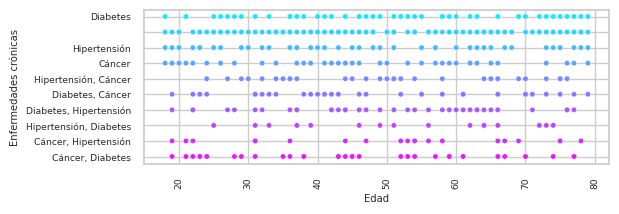

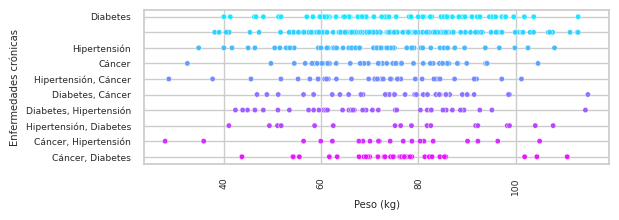

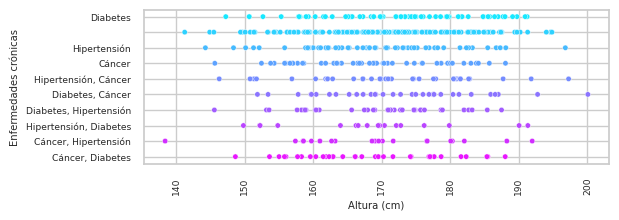

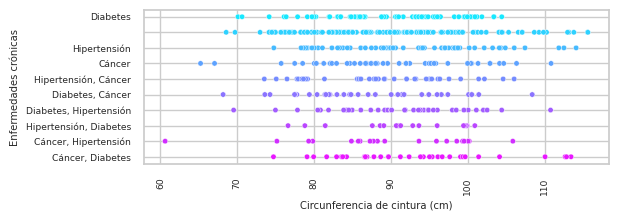

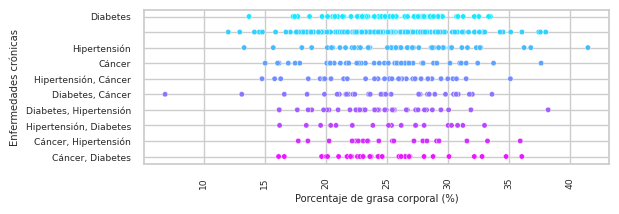

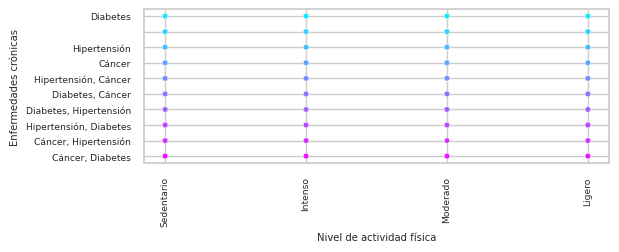

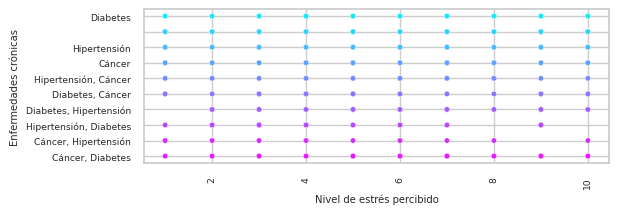

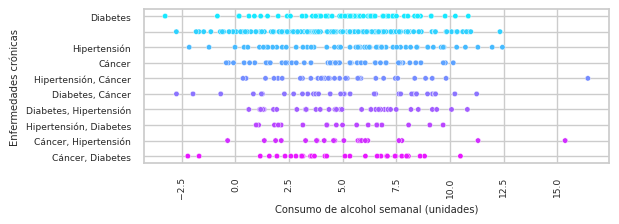

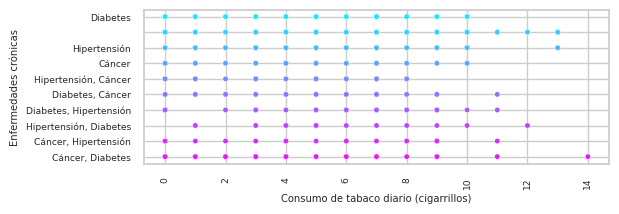

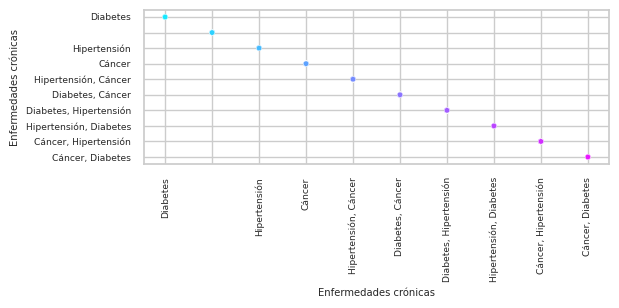

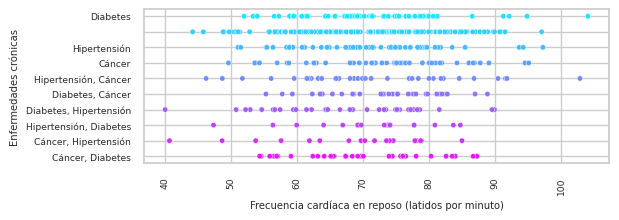

In [75]:
## Exploración de datos: Grafica de dispersión de las columnas
## Nota: Como deseamos estimar "Enfermedades crónicas", esta variable se coloca como y

sns.set(font_scale = 0.6)
sns.set_style("whitegrid")
dot_size = 15                # Define el tamaño del identificador

for feature in Columnas:
    plt.figure(figsize=(6,2))
    #sns.catplot(x=feature, hue=df['Enfermedades crónicas'], data=Muestra_df, dodge=True,)
    #sns.catplot(x=df['Fumas'], hue=feature, data=Muestra_df, dodge=True)
    #sns.countplot(x=feature, hue=df['Fumas'], data=Muestra_df, dodge=True)
    #sns.boxplot(x=df['Fumas'], y=feature, data=df)
    sns.scatterplot(data=Muestra_df, x=feature, y="Enfermedades crónicas", hue="Enfermedades crónicas", palette="cool", legend=False, s=dot_size)
    plt.xticks(rotation=90)


 El primer gráfico representa la relación entre enfermedades crónicas con respecto a la edad. Sin embargo muestra una dispersión constante a lo largo de la edad, lo que sugiere que las enfermedades crónicas no aumentan ni disminuyen significativamente con la edad en la muestra de datos. El segundo y tercer gráfico representan la relación de enfermedades crónicas con respecto al peso en kg y al porcentaje de grasa corporal, respectivamente. Ambos muestran una dispersión similar, lo que indica que las enfermedades crónicas pueden ocurrir en una variedad de pesos y porcentajes de grasa corporal.

Es importante destacar que, aunque el peso y el porcentaje de grasa corporal pueden ser factores importantes en la predisposición a las enfermedades crónicas, estos gráficos sugieren que las enfermedades crónicas pueden ocurrir en personas con diferentes características físicas. Esto puede deberse a la forma en que se simularon los datos para las enfermedades crónicas, ya que estas parecen no guardar relación con las demás variables que se están generando, como el consumo de tabaco, alcohol, cafeína, actividad física, entre otros.

Una forma de encontrar una relación más significativa sería ajustar la generación de las enfermedades crónicas para que dependan de los valores de las otras variables, lo que permitiría explorar mejor cómo estas variables influyen en la aparición de enfermedades crónicas.

Por otro lado al observar los gráficos de dispersión de las enfermedades crónicas con respecto a la actividad física, el consumo de tabaco diario y el nivel de estrés percibido, no parece haber una relación clara entre estas variables. En teoría, podríamos esperar ver una tendencia donde haya menos casos de enfermedades crónicas en la columna de actividad física intensa y que aumente gradualmente hasta llegar a la categoría de sedentario. Lo mismo se aplicaría para el consumo de tabaco diario y el nivel de estrés percibido, donde deberíamos observar menos casos de enfermedades crónicas en los niveles más bajos de estas variables.

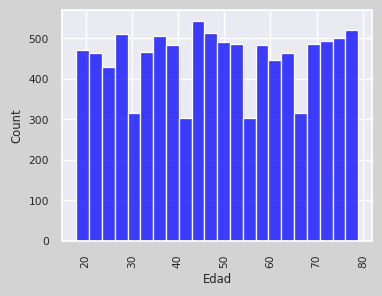

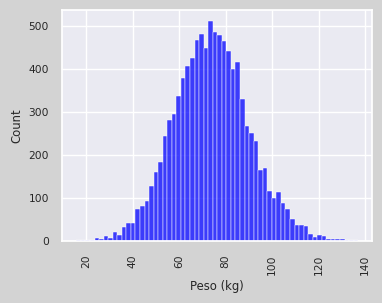

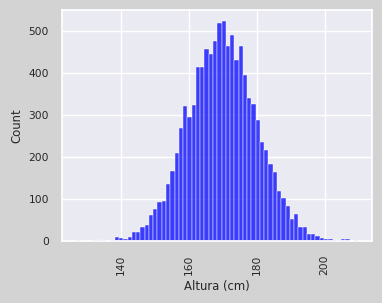

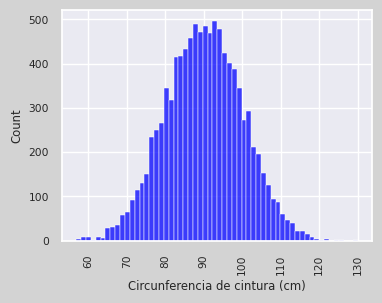

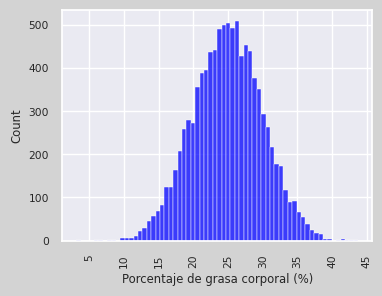

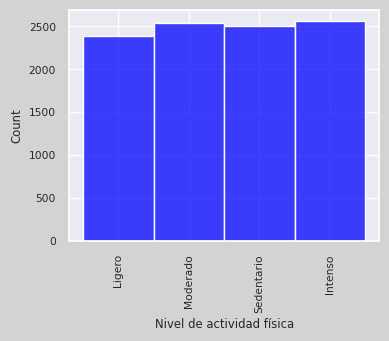

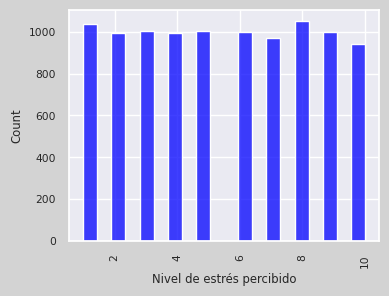

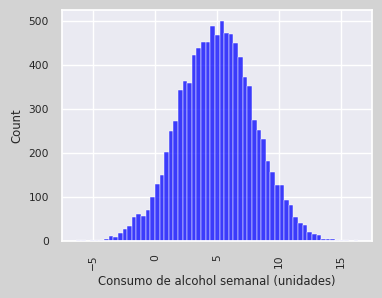

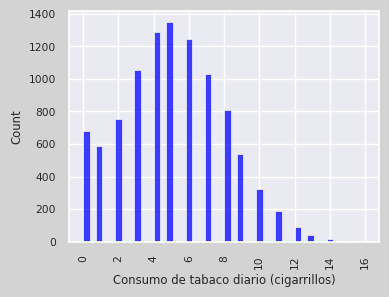

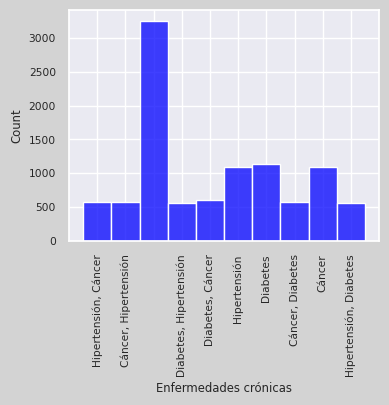

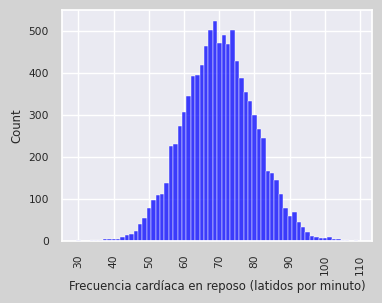

In [76]:
## Exploración de datos :  Histogramas de las columnas
sns.set(font_scale = .7)
#sns.set_style("whitegrid")

for feature in Columnas:
    plt.figure(figsize=(4,3),facecolor='lightgrey')
    sns.histplot(data=df, x=feature, color='blue')
    plt.xticks(rotation=90)

In [77]:
##Eliminar las columnas NO numéricas del df
df_numeric=df.select_dtypes(include=["float","int64"])

NameNumCol=df_numeric.columns
NameNumCol

Index(['Edad', 'Peso (kg)', 'Altura (cm)', 'Circunferencia de cintura (cm)',
       'Porcentaje de grasa corporal (%)', 'Nivel de estrés percibido',
       'Consumo de alcohol semanal (unidades)',
       'Consumo de tabaco diario (cigarrillos)',
       'Frecuencia cardíaca en reposo (latidos por minuto)'],
      dtype='object')

In [78]:
## Exploración de datos: Generación de varios gráficos

def my_pairgrid(df,col_analisis):
     mpl.rcParams["axes.labelsize"] = 20
     g = sns.PairGrid(df, vars=col_analisis)
     g = g.map_diag(sns.kdeplot, fill=True)
     g = g.map_lower(sns.scatterplot)
     g = g.map_upper(sns.kdeplot)
     return(g)

##Eliminar las columnas NO numéricas
df_numeric=df.select_dtypes(include=["float","int64"])


_ = my_pairgrid(Muestra_df,NameNumCol)

Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='Peso (kg)', ylabel='Altura (cm)'>

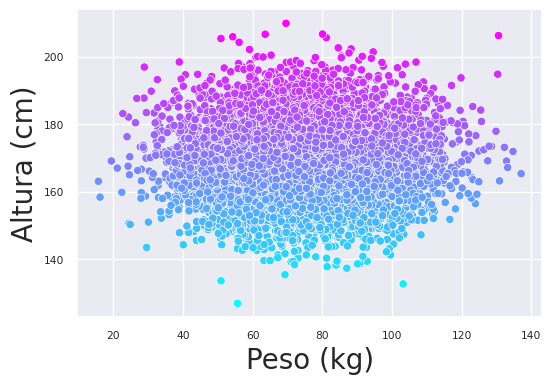

In [79]:
## Exploración de datos: grafico de dispersión de dos variables

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Peso (kg)", y="Altura (cm)", hue="Altura (cm)", palette="cool", legend=False)

In [80]:
## Exploración de datos: Matriz de correlación

##Eliminar las columnas NO numéricas
df_numeric=df.select_dtypes(include=["float","int64"])

my_corr = df_numeric.corr()
my_corr.head(10)

,Edad,Peso (kg),Altura (cm),Circunferencia de cintura (cm),Porcentaje de grasa corporal (%),Nivel de estrés percibido,Consumo de alcohol semanal (unidades),Consumo de tabaco diario (cigarrillos),Frecuencia cardíaca en reposo (latidos por minuto)
Edad,1.000000,-0.010042,0.001380,0.001951,-0.002556,0.002759,0.000078,0.025540,0.009856
Peso (kg),-0.010042,1.000000,-0.002603,0.006018,0.003393,0.008073,-0.006492,0.014032,-0.014895
Altura (cm),0.001380,-0.002603,1.000000,0.003754,0.000668,0.001883,-0.004439,0.014946,-0.004182
Circunferencia de cintura (cm),0.001951,0.006018,0.003754,1.000000,-0.003283,-0.000454,0.017746,0.009573,0.014488
Porcentaje de grasa corporal (%),-0.002556,0.003393,0.000668,-0.003283,1.000000,0.001075,0.006221,-0.018940,-0.014142
Nivel de estrés percibido,0.002759,0.008073,0.001883,-0.000454,0.001075,1.000000,0.011086,0.013789,-0.007584
Consumo de alcohol semanal (unidades),0.000078,-0.006492,-0.004439,0.017746,0.006221,0.011086,1.000000,0.016063,0.002745
Consumo de tabaco diario (cigarrillos),0.025540,0.014032,0.014946,0.009573,-0.018940,0.013789,0.016063,1.000000,-0.004785
Frecuencia cardíaca en reposo (latidos por minuto),0.009856,-0.014895,-0.004182,0.014488,-0.014142,-0.007584,0.002745,-0.004785,1.000000


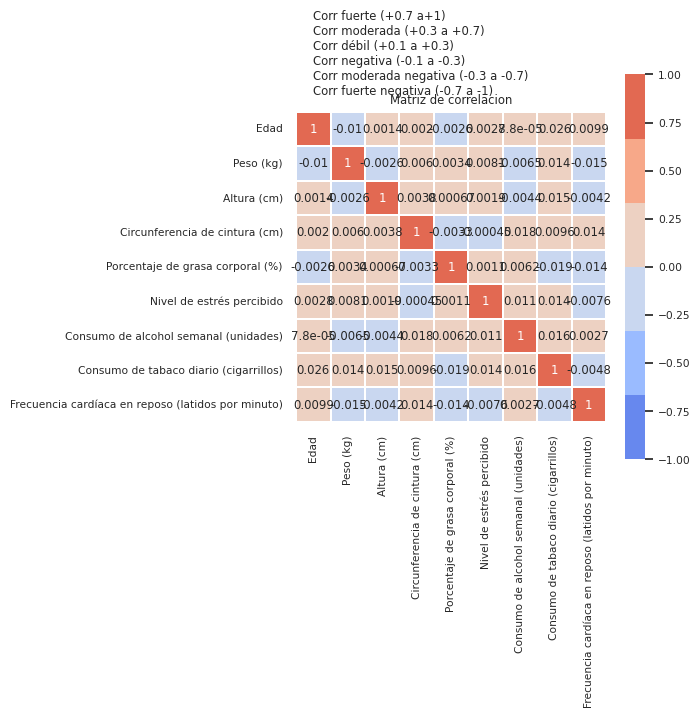

In [81]:
## Exploración de datos: Heatmap de Matriz de correlación
## Exploración de datos: Matriz de correlación

my_corr =  df_numeric.corr()

plt.figure(figsize=(5,5))
sns.heatmap(my_corr, annot=True, square=True,
            cmap=sns.color_palette("coolwarm"),
            vmax=1,      #np.max(np.sort(my_corr.values)[:,-2]),
            vmin=-1,
           linewidths=0.3)
plt.title("Matriz de correlacion")
plt.text(0.5,-0.5, "Corr fuerte (+0.7 a+1)\nCorr moderada (+0.3 a +0.7)\nCorr débil (+0.1 a +0.3)\nCorr negativa (-0.1 a -0.3)\nCorr moderada negativa (-0.3 a -0.7)\nCorr fuerte negativa (-0.7 a -1)")
plt.show()


In [82]:
# Crear una lista de tuplas de pares de variables y sus correlaciones
correlation_pairs = []

# Iterar sobre la matriz de correlación y agregar cada par de variables y su correlación a la lista
for variable_1 in my_corr.columns:
    for variable_2 in my_corr.index:
        if variable_1 != variable_2:
            correlation = my_corr.loc[variable_1, variable_2]
            correlation_pairs.append((variable_1, variable_2, correlation))

# Crear un DataFrame a partir de la lista de pares de variables y correlaciones
correlation_df = pd.DataFrame(correlation_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

print("DataFrame con pares de variables y sus correlaciones:")
correlation_df.sort_values(by='Correlation', ascending=True).head(5)


DataFrame con pares de variables y sus correlaciones:


,Variable 1,Variable 2,Correlation
60,Consumo de tabaco diario (cigarrillos),Porcentaje de grasa corporal (%),-0.018940
38,Porcentaje de grasa corporal (%),Consumo de tabaco diario (cigarrillos),-0.018940
65,Frecuencia cardíaca en reposo (latidos por min...,Peso (kg),-0.014895
15,Peso (kg),Frecuencia cardíaca en reposo (latidos por min...,-0.014895
68,Frecuencia cardíaca en reposo (latidos por min...,Porcentaje de grasa corporal (%),-0.014142


In [83]:
print("DataFrame con pares de variables y sus correlaciones:")
correlation_df.sort_values(by='Correlation', ascending=False).head(5)

DataFrame con pares de variables y sus correlaciones:


,Variable 1,Variable 2,Correlation
56,Consumo de tabaco diario (cigarrillos),Edad,0.025540
6,Edad,Consumo de tabaco diario (cigarrillos),0.025540
29,Circunferencia de cintura (cm),Consumo de alcohol semanal (unidades),0.017746
51,Consumo de alcohol semanal (unidades),Circunferencia de cintura (cm),0.017746
54,Consumo de alcohol semanal (unidades),Consumo de tabaco diario (cigarrillos),0.016063



## **Modelo 1: RandomForestClassifier**     Estima: Enf crónicas##

El RandomForestClassifier es un algoritmo de aprendizaje supervisado utilizado para tareas de clasificación en machine learning. Funciona creando un conjunto (o "bosque") de árboles de decisión durante el entrenamiento.
RandomForestClassifier es un modelo flexible y potente que aprovecha la fortaleza de múltiples árboles de decisión para realizar predicciones precisas en problemas de clasificación.

In [84]:
df.columns

Index(['Edad', 'Peso (kg)', 'Altura (cm)', 'Circunferencia de cintura (cm)',
       'Porcentaje de grasa corporal (%)', 'Nivel de actividad física',
       'Nivel de estrés percibido', 'Consumo de alcohol semanal (unidades)',
       'Consumo de tabaco diario (cigarrillos)', 'Enfermedades crónicas',
       'Frecuencia cardíaca en reposo (latidos por minuto)'],
      dtype='object')

In [85]:
df.head(3)

,Edad,Peso (kg),Altura (cm),Circunferencia de cintura (cm),Porcentaje de grasa corporal (%),Nivel de actividad física,Nivel de estrés percibido,Consumo de alcohol semanal (unidades),Consumo de tabaco diario (cigarrillos),Enfermedades crónicas,Frecuencia cardíaca en reposo (latidos por minuto)
0,36,91.050457,171.293175,81.524027,25.249631,Ligero,9,-0.472104,5,"Hipertensión, Cáncer",50.891709
1,63,63.981545,173.410235,100.823586,33.132687,Moderado,7,6.690746,9,"Cáncer, Hipertensión",64.533420
2,79,70.536234,166.292509,82.920502,27.223671,Moderado,7,4.118718,3,,87.022587


In [86]:
#df.loc[df['Enfermedades crónicas']=="",['Enfermedades crónicas']]="NaN"
#df.loc[df['Historial médico familiar']=="",['Historial médico familiar']]="NaN"
#df.loc[df['Nivel de actividad física']=="",['Nivel de actividad física']]="NaN"
df.loc[df['Enfermedades crónicas'] == "", ['Enfermedades crónicas']] = "Ninguna enfermeda crónica"

In [87]:
## Para cambiar los textos de Enfermedades crónicas por números, pero serán los números de la frecuencia
## Después habra que hacer un diccionario, o un map para retransformar los datos

## son 6 enfermedades crónicas y estan distribuidas en 23 combinaciones aprox.

tabla_frecuencias = df.groupby('Enfermedades crónicas').size().reset_index(name='Frecuencia')

tabla_frecuencias

,Enfermedades crónicas,Frecuencia
0,Cáncer,1086
1,"Cáncer, Diabetes",573
2,"Cáncer, Hipertensión",572
3,Diabetes,1135
4,"Diabetes, Cáncer",598
5,"Diabetes, Hipertensión",552
6,Hipertensión,1089
7,"Hipertensión, Cáncer",574
8,"Hipertensión, Diabetes",563
9,Ninguna enfermeda crónica,3258


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

## MODELO: Definir los componentes del modelo

## El modelo va a estimar el Peso en función de Edad, Altura, IMC

##        Xs => Variables independientes= Características o features (TODAS LAS COLUMNAS)
##        y  => Variable dependiente, variable objetivo o target (Enferm_Cronicas)

X = df.drop(columns=['Enfermedades crónicas'], axis=1).copy()    # Características (vars independientes)
y = df['Enfermedades crónicas'].copy()                   # Variable objetivo (dependiente)


In [89]:
X.shape

(10000, 10)

In [90]:
X.head(3)

,Edad,Peso (kg),Altura (cm),Circunferencia de cintura (cm),Porcentaje de grasa corporal (%),Nivel de actividad física,Nivel de estrés percibido,Consumo de alcohol semanal (unidades),Consumo de tabaco diario (cigarrillos),Frecuencia cardíaca en reposo (latidos por minuto)
0,36,91.050457,171.293175,81.524027,25.249631,Ligero,9,-0.472104,5,50.891709
1,63,63.981545,173.410235,100.823586,33.132687,Moderado,7,6.690746,9,64.533420
2,79,70.536234,166.292509,82.920502,27.223671,Moderado,7,4.118718,3,87.022587


In [91]:
y.unique()

array(['Hipertensión, Cáncer', 'Cáncer, Hipertensión',
       'Ninguna enfermeda crónica', 'Diabetes, Hipertensión',
       'Diabetes, Cáncer', 'Hipertensión', 'Diabetes', 'Cáncer, Diabetes',
       'Cáncer', 'Hipertensión, Diabetes'], dtype=object)

In [92]:
y.shape

(10000,)

In [93]:
y.value_counts()

Enfermedades crónicas
Ninguna enfermeda crónica    3258
Diabetes                     1135
Hipertensión                 1089
Cáncer                       1086
Diabetes, Cáncer              598
Hipertensión, Cáncer          574
Cáncer, Diabetes              573
Cáncer, Hipertensión          572
Hipertensión, Diabetes        563
Diabetes, Hipertensión        552
Name: count, dtype: int64

In [94]:
## MODELO: Identificar columnas con variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols

Index(['Nivel de actividad física'], dtype='object')

In [95]:
## MODELO: Aplicar codificación one-hot a las variables categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols)
X_encoded

,Edad,Peso (kg),Altura (cm),Circunferencia de cintura (cm),Porcentaje de grasa corporal (%),Nivel de estrés percibido,Consumo de alcohol semanal (unidades),Consumo de tabaco diario (cigarrillos),Frecuencia cardíaca en reposo (latidos por minuto),Nivel de actividad física_Intenso,Nivel de actividad física_Ligero,Nivel de actividad física_Moderado,Nivel de actividad física_Sedentario
0,36,91.050457,171.293175,81.524027,25.249631,9,-0.472104,5,50.891709,False,True,False,False
1,63,63.981545,173.410235,100.823586,33.132687,7,6.690746,9,64.533420,False,False,True,False
2,79,70.536234,166.292509,82.920502,27.223671,7,4.118718,3,87.022587,False,False,True,False
3,33,82.320997,173.153785,87.494010,16.417424,9,1.286660,7,69.105768,False,False,False,True
4,65,79.466420,174.401338,85.296943,23.939330,4,6.528420,3,69.196186,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,29,69.309453,170.425132,91.501164,23.132833,9,7.621456,7,67.068598,True,False,False,False
9996,22,57.429242,163.868466,89.835102,23.430736,3,5.446208,2,66.078952,True,False,False,False
9997,18,94.171769,173.484447,103.839539,26.438144,5,5.694462,6,94.080232,False,False,True,False
9998,64,50.247379,180.142688,97.653781,23.782873,7,7.415086,0,62.233284,False,False,False,True


In [96]:
X_encoded.shape

(10000, 13)

In [97]:
y.unique()

array(['Hipertensión, Cáncer', 'Cáncer, Hipertensión',
       'Ninguna enfermeda crónica', 'Diabetes, Hipertensión',
       'Diabetes, Cáncer', 'Hipertensión', 'Diabetes', 'Cáncer, Diabetes',
       'Cáncer', 'Hipertensión, Diabetes'], dtype=object)

**Modelo:  RandomForestClassifier   Estima= Fuma 1=Si  0=no**


In [98]:
## MODELO: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=10)

print(f"Tamaño archivo inicial = {df.shape}")
print(f"Tamaño X_train = {X_train.shape[0]} ({X_train.shape[0]/df.shape[0]*100} %)")
print(f"Tamaño X_test = {X_test.shape[0]} ({X_test.shape[0]/df.shape[0]*100} %)")

print(f"Tamaño y_train = {y_train.shape}")
print(f"Tamaño y_test = {y_test.shape}")


Tamaño archivo inicial = (10000, 11)
Tamaño X_train = 7000 (70.0 %)
Tamaño X_test = 3000 (30.0 %)
Tamaño y_train = (7000,)
Tamaño y_test = (3000,)


In [99]:
## MODELO:  Inicializar el clasificador Random Forest y entrenar el modelo
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)    #en este modelo sólo se puede meter en y a variables categóricas
rf_classifier.fit(X_train, y_train)                                          ##Ajuste del modelo

RandomForestClassifier(random_state=42)

In [100]:
## MODELO: Hacer predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

esperado=y_test     #serie pandas
pronostico=y_pred   #arreglo numpy

df_Est_Modelo=pd.DataFrame()
df_Est_Modelo["Esperado"]=esperado      #No problema
df_Est_Modelo["Pronostico"]=pronostico

df_Est_Modelo.to_csv('ResulModelo.csv', index=False)

df_Est_Modelo.head(100)

,Esperado,Pronostico
937,Cáncer,Ninguna enfermeda crónica
9355,Ninguna enfermeda crónica,Ninguna enfermeda crónica
2293,"Diabetes, Cáncer",Ninguna enfermeda crónica
192,Ninguna enfermeda crónica,Ninguna enfermeda crónica
8675,"Hipertensión, Cáncer",Ninguna enfermeda crónica
...,...,...
327,"Cáncer, Hipertensión",Ninguna enfermeda crónica
7379,"Hipertensión, Cáncer",Ninguna enfermeda crónica
7566,"Hipertensión, Diabetes",Ninguna enfermeda crónica
2594,Ninguna enfermeda crónica,Ninguna enfermeda crónica


In [101]:
## MODELO: Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.309


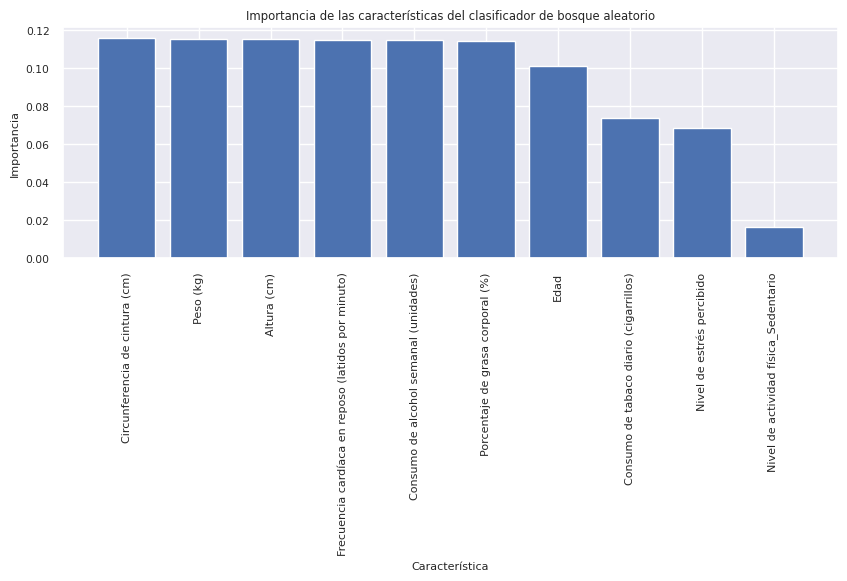

In [102]:
# Obtiene la importancia de las características
importances = rf_classifier.feature_importances_

# Suponiendo que df es tu DataFrame y cada columna es una característica
feature_names = X_encoded.columns

# Asegura que las listas tengan el mismo tamaño
num_features = min(len(feature_names), len(importances))
importances = importances[:num_features]
feature_names = feature_names[:num_features]

# Ordena las características según su importancia
sorted_indices = importances.argsort()[::-1]   #[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = feature_names[sorted_indices]

sorted_importances=sorted_importances[0:10]     ##Solo muestra los 10 primeros
sorted_features=sorted_features[0:10]           ##Solo muestra los 10 primeros

# Crea un gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(10, 3))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.xticks(rotation=90,fontsize=8)
plt.xlabel('Característica',fontsize=8)
plt.ylabel('Importancia',fontsize=8)
plt.title('Importancia de las características del clasificador de bosque aleatorio')
plt.show()

In [103]:
## Modelo:  Imprimir el reporte de clasificación y la matriz de confusión
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                           precision    recall  f1-score   support

                   Cáncer       0.21      0.02      0.04       355
         Cáncer, Diabetes       0.00      0.00      0.00       141
     Cáncer, Hipertensión       0.00      0.00      0.00       168
                 Diabetes       0.06      0.01      0.02       347
         Diabetes, Cáncer       0.00      0.00      0.00       182
   Diabetes, Hipertensión       0.00      0.00      0.00       158
             Hipertensión       0.02      0.00      0.01       343
     Hipertensión, Cáncer       0.00      0.00      0.00       182
   Hipertensión, Diabetes       0.00      0.00      0.00       170
Ninguna enfermeda crónica       0.32      0.96      0.48       954

                 accuracy                           0.31      3000
                macro avg       0.06      0.10      0.05      3000
             weighted avg       0.14      0.31      0.16      3000



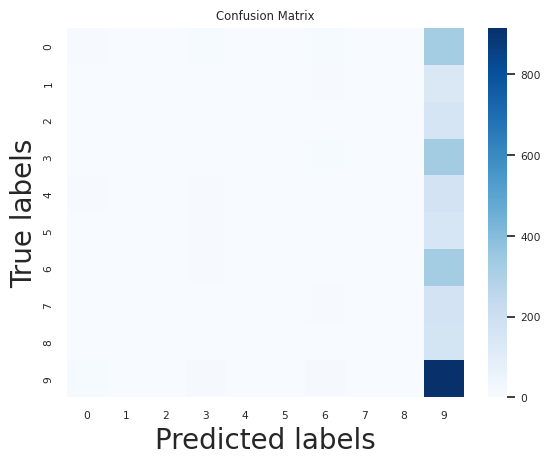

In [104]:
cm = confusion_matrix(y_test, y_pred)

# Crear el heatmap utilizando seaborn
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues")

# Añadir etiquetas y título
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Mostrar el plot
plt.show()


In [105]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[  7   1   2   8   0   1   9   0   0 327]
 [  1   0   1   1   0   1   4   0   0 133]
 [  2   0   0   2   0   0   3   0   0 161]
 [  1   0   1   3   0   0  10   1   0 331]
 [  5   0   0   5   0   0   2   0   0 170]
 [  3   1   0   4   0   0   2   0   1 147]
 [  3   1   0   7   1   1   1   1   0 328]
 [  2   0   1   3   1   0   4   0   0 171]
 [  1   0   0   3   0   0   0   0   0 166]
 [  8   1   1  13   1   2  12   0   0 916]]


##**Modelo: XGBoost**

In [106]:
from sklearn.preprocessing import LabelEncoder

#### Se requiere transformal la columna y con valores entre 0 y 23
# Codificar las etiquetas de clase
label_encoder = LabelEncoder()
label_encoder.fit(y)

# 2. Transformar ambos conjuntos de datos con el mismo LabelEncoder
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# 3. Retransformar los datos si es necesario
# Por ejemplo, después de entrenar o predecir con el modelo
#y_train_original = label_encoder.inverse_transform(y_train_encoded)
#y_test_original = label_encoder.inverse_transform(y_test_encoded)

In [107]:
y


0            Hipertensión, Cáncer
1            Cáncer, Hipertensión
2       Ninguna enfermeda crónica
3          Diabetes, Hipertensión
4                Diabetes, Cáncer
                  ...            
9995             Diabetes, Cáncer
9996       Hipertensión, Diabetes
9997                       Cáncer
9998                       Cáncer
9999       Diabetes, Hipertensión
Name: Enfermedades crónicas, Length: 10000, dtype: object

In [108]:
print(f"y_train_encoded = {len(np.unique(y_train_encoded))} ")    #Tienen que tener los mismos elementos
print(f"y_test_encoded = {len(np.unique(y_test_encoded))} ")

y_train_encoded = 10 
y_test_encoded = 10 


In [109]:
!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## MODELO:  Inicializar el clasificador Random Forest y entrenar el modelo
clf_xgb=xgb.XGBClassifier() #objective="binary;logistic",missing=None, seed=42)
# Entrena el clasificador
clf_xgb.fit(X_train,
            y_train_encoded, #y_train,
            verbose=True,
            early_stopping_rounds=10,
            #eval_metric="aucpr",
            eval_set=[(X_test,y_test_encoded)]
            )


[0]	validation_0-mlogloss:2.21464
[1]	validation_0-mlogloss:2.17188
[2]	validation_0-mlogloss:2.14984
[3]	validation_0-mlogloss:2.13614


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-mlogloss:2.12730
[5]	validation_0-mlogloss:2.12599
[6]	validation_0-mlogloss:2.12507
[7]	validation_0-mlogloss:2.12396
[8]	validation_0-mlogloss:2.12633
[9]	validation_0-mlogloss:2.12925
[10]	validation_0-mlogloss:2.13219
[11]	validation_0-mlogloss:2.13582
[12]	validation_0-mlogloss:2.14061
[13]	validation_0-mlogloss:2.14434
[14]	validation_0-mlogloss:2.14532
[15]	validation_0-mlogloss:2.14725
[16]	validation_0-mlogloss:2.14976
[17]	validation_0-mlogloss:2.15449


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [110]:
## MODELO: Hacer predicciones en el conjunto de prueba
y_pred = clf_xgb.predict(X_test)
y_pred[0:5]

array([9, 9, 9, 9, 9])

In [111]:
y_test_original = label_encoder.inverse_transform(y_test_encoded)
y_pred_original = label_encoder.inverse_transform(y_pred)


esperado=y_test_original     #serie pandas
pronostico=y_pred_original   #arreglo numpy

df_Est_Modelo=pd.DataFrame()
df_Est_Modelo["Esperado"]=esperado      #No problema
df_Est_Modelo["Pronostico"]=pronostico

df_Est_Modelo.to_csv('ResulModelo.csv', index=False)

df_Est_Modelo.head(100)

,Esperado,Pronostico
0,Cáncer,Ninguna enfermeda crónica
1,Ninguna enfermeda crónica,Ninguna enfermeda crónica
2,"Diabetes, Cáncer",Ninguna enfermeda crónica
3,Ninguna enfermeda crónica,Ninguna enfermeda crónica
4,"Hipertensión, Cáncer",Ninguna enfermeda crónica
...,...,...
95,"Cáncer, Hipertensión",Ninguna enfermeda crónica
96,"Hipertensión, Cáncer",Ninguna enfermeda crónica
97,"Hipertensión, Diabetes",Ninguna enfermeda crónica
98,Ninguna enfermeda crónica,Ninguna enfermeda crónica


In [112]:
#y_test_encoded
#y_train_encoded

# Realiza predicciones en el conjunto de prueba
y_pred = clf_xgb.predict(X_test)

# Calcula la precisión del modelo
#accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test_encoded, y_pred)

print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.31


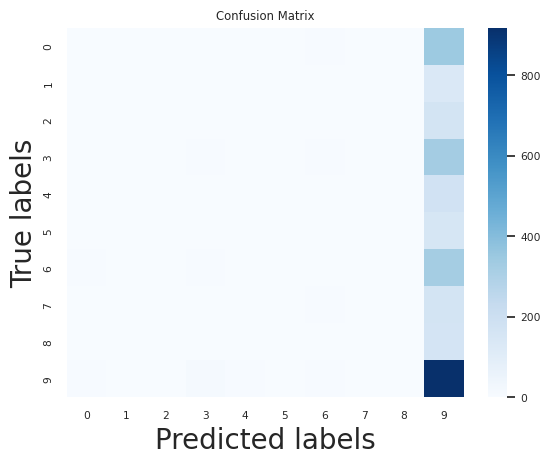

In [113]:
cm_XgBoost = confusion_matrix(y_test_encoded, y_pred)

# Crear el heatmap utilizando seaborn
sns.heatmap(cm_XgBoost, annot=False, fmt="d", cmap="Blues")

# Añadir etiquetas y título
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Mostrar el plot
plt.show()

In [114]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))


Confusion Matrix:
[[  1   0   1   2   1   0   4   0   1 345]
 [  1   0   0   2   2   0   3   0   0 133]
 [  2   0   0   0   0   1   0   0   0 165]
 [  1   1   2   7   0   1   7   0   1 327]
 [  1   0   0   2   0   1   1   0   0 177]
 [  0   0   0   2   2   0   1   0   0 153]
 [  4   1   2   5   0   1   3   2   2 323]
 [  2   0   0   2   1   2   6   1   0 168]
 [  2   0   1   1   0   0   3   0   0 163]
 [  4   1   0  15   6   1   5   1   3 918]]


### Ejemplo 2: Diagrama de dispersión entre IMC y edad


##  Creación de una Aplicación de Predicción de Enfermedades Crónicas con Streamlit

En esta sección, presentamos un código base que los estudiantes del diplomado pueden utilizar como referencia para crear una aplicación interactiva utilizando Streamlit. El código base emplea un clasificador de Bosque Aleatorio (Random Forest Classifier) para predecir la probabilidad de padecer enfermedades crónicas.

Los estudiantes del diplomado tienen la tarea de seleccionar las variables del conjunto de datos proporcionado, basándose en un análisis previo. Estas variables se utilizarán como características (features) para entrenar el modelo de clasificación. Luego, podrán personalizar la interfaz de usuario de la aplicación y la lógica del modelo según sus necesidades específicas, creando así su propia aplicación de predicción de enfermedades crónicas.

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Generar datos simulados y crear un DataFrame
# (Aquí deberías reemplazar este bloque de código con tu código para generar y cargar los datos simulados)

# Definir las características (features) y la variable objetivo
X = df.drop(columns=['Enfermedades crónicas'])  # Características
y = df['Enfermedades crónicas']  # Variable objetivo

# Identificar columnas con variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Aplicar codificación one-hot a las variables categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar el clasificador Random Forest y entrenar el modelo
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir el reporte de clasificación y la matriz de confusión
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Realizar una predicción para un nuevo conjunto de datos (opcional)
# (Aquí deberías reemplazar este bloque de código con tus datos de predicción)
# new_data = ...
# new_data_encoded = pd.get_dummies(new_data, columns=categorical_cols)
# predicted_probs = rf_classifier.predict_proba(new_data_encoded)


Accuracy: 0.3245

Classification Report:
                           precision    recall  f1-score   support

                   Cáncer       0.14      0.02      0.03       222
         Cáncer, Diabetes       0.00      0.00      0.00       133
     Cáncer, Hipertensión       0.00      0.00      0.00       102
                 Diabetes       0.10      0.01      0.02       222
         Diabetes, Cáncer       0.00      0.00      0.00       118
   Diabetes, Hipertensión       0.00      0.00      0.00       102
             Hipertensión       0.10      0.01      0.03       208
     Hipertensión, Cáncer       0.00      0.00      0.00       117
   Hipertensión, Diabetes       0.00      0.00      0.00       117
Ninguna enfermeda crónica       0.33      0.97      0.50       659

                 accuracy                           0.32      2000
                macro avg       0.07      0.10      0.06      2000
             weighted avg       0.15      0.32      0.17      2000


Confusion Matrix:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
import joblib
joblib.dump(rf_classifier, 'modelo_rf_entrenado.pkl')

['modelo_rf_entrenado.pkl']

In [117]:
!pip install streamlit

In [120]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Cargar el modelo entrenado
rf_classifier = joblib.load('modelo_rf_entrenado.pkl')

In [121]:


nombres_columnas = ['Edad', 'Peso (kg)', 'Altura (cm)', 'Circunferencia de cintura (cm)',
       'Porcentaje de grasa corporal (%)', 'Nivel de estrés percibido',
       'Consumo de alcohol semanal (unidades)',
       'Consumo de tabaco diario (cigarrillos)',
       'Frecuencia cardíaca en reposo (latidos por minuto)',
       'Historial médico familiar_', 'Historial médico familiar_Cáncer',
       'Historial médico familiar_Cáncer, Diabetes',
       'Historial médico familiar_Cáncer, Diabetes, Enfermedades cardiovasculares',
       'Historial médico familiar_Cáncer, Diabetes, Hipertensión',
       'Historial médico familiar_Cáncer, Enfermedades cardiovasculares',
       'Historial médico familiar_Cáncer, Enfermedades cardiovasculares, Diabetes',
       'Historial médico familiar_Cáncer, Enfermedades cardiovasculares, Hipertensión',
       'Historial médico familiar_Cáncer, Hipertensión',
       'Historial médico familiar_Cáncer, Hipertensión, Diabetes',
       'Historial médico familiar_Cáncer, Hipertensión, Enfermedades cardiovasculares',
       'Historial médico familiar_Diabetes',
       'Historial médico familiar_Diabetes, Cáncer',
       'Historial médico familiar_Diabetes, Cáncer, Enfermedades cardiovasculares',
       'Historial médico familiar_Diabetes, Cáncer, Hipertensión',
       'Historial médico familiar_Diabetes, Enfermedades cardiovasculares',
       'Historial médico familiar_Diabetes, Enfermedades cardiovasculares, Cáncer',
       'Historial médico familiar_Diabetes, Enfermedades cardiovasculares, Hipertensión',
       'Historial médico familiar_Diabetes, Hipertensión',
       'Historial médico familiar_Diabetes, Hipertensión, Cáncer',
       'Historial médico familiar_Diabetes, Hipertensión, Enfermedades cardiovasculares',
       'Historial médico familiar_Enfermedades cardiovasculares',
       'Historial médico familiar_Enfermedades cardiovasculares, Cáncer',
       'Historial médico familiar_Enfermedades cardiovasculares, Cáncer, Diabetes',
       'Historial médico familiar_Enfermedades cardiovasculares, Cáncer, Hipertensión',
       'Historial médico familiar_Enfermedades cardiovasculares, Diabetes',
       'Historial médico familiar_Enfermedades cardiovasculares, Diabetes, Cáncer',
       'Historial médico familiar_Enfermedades cardiovasculares, Diabetes, Hipertensión',
       'Historial médico familiar_Enfermedades cardiovasculares, Hipertensión',
       'Historial médico familiar_Enfermedades cardiovasculares, Hipertensión, Cáncer',
       'Historial médico familiar_Enfermedades cardiovasculares, Hipertensión, Diabetes',
       'Historial médico familiar_Hipertensión',
       'Historial médico familiar_Hipertensión, Cáncer',
       'Historial médico familiar_Hipertensión, Cáncer, Diabetes',
       'Historial médico familiar_Hipertensión, Cáncer, Enfermedades cardiovasculares',
       'Historial médico familiar_Hipertensión, Diabetes',
       'Historial médico familiar_Hipertensión, Diabetes, Cáncer',
       'Historial médico familiar_Hipertensión, Diabetes, Enfermedades cardiovasculares',
       'Historial médico familiar_Hipertensión, Enfermedades cardiovasculares',
       'Historial médico familiar_Hipertensión, Enfermedades cardiovasculares, Cáncer',
       'Historial médico familiar_Hipertensión, Enfermedades cardiovasculares, Diabetes',
       'Nivel de actividad física_Intenso', 'Nivel de actividad física_Ligero',
       'Nivel de actividad física_Moderado',
       'Nivel de actividad física_Sedentario']

palabra_inicio = 'Historial médico familiar_'
# Filtrar las strings que comienzan con la palabra deseada
filtradas = [elemento for elemento in nombres_columnas if elemento.startswith(palabra_inicio)]
#print(len(filtradas))

palabra_inicio2 = 'Nivel de actividad física_'
# Filtrar las strings que comienzan con la palabra deseada
filtradas2 = [elemento for elemento in nombres_columnas if elemento.startswith(palabra_inicio2)]
#print(len(filtradas2))

# Definir la aplicación Streamlit
st.title('Aplicación de Predicción de Enfermedades Crónicas')
st.write('Esta aplicación utiliza un modelo de Random Forest para predecir la presencia de enfermedades crónicas.')

# Mostrar la entrada de usuario y realizar predicciones
st.subheader('Realizar Predicciones Personalizadas')


# Interfaz de usuario para ingresar los datos
edad = st.slider('Edad', min_value=18, max_value=80, value=25)
peso = st.slider('Peso (kg)', min_value=40, max_value=150, value=70)
altura = st.slider('Altura (cm)', min_value=100, max_value=250, value=170)
cintura = st.slider('Circunferencia de cintura (cm)', min_value=60, max_value=120, value=90)
porcentaje_grasa = st.slider('Porcentaje de grasa corporal (%)', min_value=5, max_value=50, value=20)
historial_medico = st.multiselect('Historial Médico Familiar (Elegir opcion/es):', ['','Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares'])
nivel_activ_fis = st.selectbox('Nivel de actividad física', ['Sedentario', 'Ligero', 'Moderado', 'Intenso'])
estres = st.slider('Nivel de estrés percibido', min_value=1, max_value=10, value=5)
alcohol = st.slider('Consumo de alcohol (unidades por semana)', min_value=0, max_value=20, value=3)
tabaco = st.slider('Consumo de tabaco (cigarrillos por día)', min_value=0, max_value=20, value=0)
frecuencia_cardiaca = st.slider('Frecuencia cardíaca en reposo (latidos por minuto)', min_value=40, max_value=120, value=70)


str_historial_medico = ', '.join(historial_medico)

lista = [edad,peso,altura,cintura,porcentaje_grasa,estres,alcohol,tabaco,frecuencia_cardiaca]
#print(len(lista))

var2 = 'Historial médico familiar_'+ str_historial_medico
historial = np.zeros(len(filtradas))
#print(len(historial))
historial[filtradas.index(var2)] = 1
#print(len(historial))
lista.extend(historial.tolist())
#print(len(lista))

var = 'Nivel de actividad física_'+ nivel_activ_fis
nivel = np.zeros(len(filtradas2))
#print(len(nivel))
nivel[filtradas2.index(var)] = 1
#print(len(nivel))
lista.extend(nivel.tolist())
#print(len(lista))

# Realizar predicción cuando se presiona el botón
if st.button('Realizar Predicción'):

    user_input = {}
    for col, val in zip(nombres_columnas, lista):
      user_input[col] = val
    #print(user_input)

    user_input_df = pd.DataFrame(user_input,index=[0])

    # Realizar la predicción
    prediction = rf_classifier.predict(user_input_df)

    # Mostrar el resultado
    st.write('Usted padece', prediction[0])
